In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import random

from matplotlib.ticker import StrMethodFormatter
from statsmodels.tsa.stattools import adfuller
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, RepeatVector, TimeDistributed
from sklearn.metrics import mean_squared_error
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.backend import clear_session

from tensorflow.random import set_seed
set_seed(42)

%matplotlib inline

In [3]:
plt.style.use('ggplot')

In [4]:
# Check library version 
print('Numpy: ', np.__version__)
print('Pandas: ', pd.__version__)
print('Seaborn: ', sns.__version__)

Numpy:  1.22.4
Pandas:  1.5.3
Seaborn:  0.11.1


In [5]:
loc = "version1_data\dataset.xlsx"
sheet_name = "electdata"
dataset = pd.read_excel(open(loc, 'rb'), sheet_name=sheet_name, engine = 'openpyxl')
dataset.columns = dataset.columns.astype(str)
dataset = dataset.iloc[:,1:].T

In [6]:
dataset

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
cluster,2,7,4,5,4,6,3,4,4,4,...,1,2,1,1,1,1,1,5,4,1
2022-01-01 00:00:00,717,772,109,593,918,193,856,275,109,107,...,295,1160,557,228,307,13,1100,402,276,742
2022-01-01 01:00:00,926,769,88,441,504,296,718,421,110,98,...,321,1058,538,73,313,0,635,523,5299,655
2022-01-01 02:00:00,431,856,97,353,473,117,603,624,110,83,...,437,242,460,180,423,0,404,336,501,502
2022-01-01 03:00:00,558,741,0,382,480,129,548,738,110,78,...,386,798,451,247,604,0,383,325,414,547
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 19:00:00,1772,3025,454,463,2239,641,998,1041,534,1050,...,509,1179,953,675,387,2,1252,765,1719,291
2022-12-31 20:00:00,3443,4364,685,783,1788,1073,1576,901,1661,857,...,559,1603,930,404,3402,0,1120,732,2287,264
2022-12-31 21:00:00,1991,2493,742,1330,1955,889,1315,1008,1939,694,...,765,1334,1027,368,1340,166,1031,1475,1638,170
2022-12-31 22:00:00,2314,3769,582,2024,1692,661,1191,3390,152,774,...,815,1650,978,398,979,383,1266,1030,1168,175


In [7]:
data_cluster = dataset.T.groupby('cluster').mean()
data_cluster = data_cluster.T
data_cluster

cluster,1,2,3,4,5,6,7
2022-01-01 00:00:00,413.692308,716.50,608.333333,311.666667,510.333333,431.750,787.8
2022-01-01 01:00:00,340.923077,925.75,594.444444,627.500000,396.666667,426.625,1355.6
2022-01-01 02:00:00,293.307692,430.75,602.444444,326.555556,257.333333,413.625,1173.2
2022-01-01 03:00:00,305.538462,558.50,529.666667,324.277778,286.000000,432.750,784.8
2022-01-01 04:00:00,466.153846,435.50,474.111111,302.388889,322.333333,373.125,712.0
...,...,...,...,...,...,...,...
2022-12-31 19:00:00,536.153846,1185.25,1311.000000,1450.611111,663.666667,633.750,2868.4
2022-12-31 20:00:00,904.769231,1590.00,1725.444444,1467.388889,721.333333,826.375,4456.8
2022-12-31 21:00:00,620.153846,1332.25,2558.000000,1490.722222,1123.666667,676.000,2550.2
2022-12-31 22:00:00,690.230769,1652.50,1056.444444,1357.333333,1318.000000,543.500,3571.8


In [8]:
data_cluster.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8760 entries, 2022-01-01 00:00:00 to 2022-12-31 23:00:00
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       8760 non-null   float64
 1   2       8760 non-null   float64
 2   3       8760 non-null   float64
 3   4       8760 non-null   float64
 4   5       8760 non-null   float64
 5   6       8760 non-null   float64
 6   7       8760 non-null   float64
dtypes: float64(7)
memory usage: 547.5+ KB


In [9]:
data_cluster.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
1,8760.0,814.236310,340.463401,202.230769,554.134615,758.192308,1017.423077,2586.461538
2,8760.0,1020.317951,516.148495,118.250000,697.500000,890.625000,1196.875000,5181.750000
3,8760.0,1107.852156,488.998152,31.666667,751.638889,1009.333333,1359.555556,4694.222222
4,8760.0,1288.556697,568.276951,238.500000,876.166667,1203.722222,1595.402778,4457.222222
5,8760.0,1331.704985,869.762871,123.000000,693.666667,1075.666667,1715.416667,7248.666667
6,8760.0,1085.838499,619.565307,144.625000,634.250000,941.375000,1372.875000,5305.250000
7,8760.0,1988.571393,1151.751135,148.200000,1146.300000,1685.400000,2503.400000,8736.000000


In [10]:
data_cluster.index =pd.to_datetime(data_cluster.index)
data_cluster.index

DatetimeIndex(['2022-01-01 00:00:00', '2022-01-01 01:00:00',
               '2022-01-01 02:00:00', '2022-01-01 03:00:00',
               '2022-01-01 04:00:00', '2022-01-01 05:00:00',
               '2022-01-01 06:00:00', '2022-01-01 07:00:00',
               '2022-01-01 08:00:00', '2022-01-01 09:00:00',
               ...
               '2022-12-31 14:00:00', '2022-12-31 15:00:00',
               '2022-12-31 16:00:00', '2022-12-31 17:00:00',
               '2022-12-31 18:00:00', '2022-12-31 19:00:00',
               '2022-12-31 20:00:00', '2022-12-31 21:00:00',
               '2022-12-31 22:00:00', '2022-12-31 23:00:00'],
              dtype='datetime64[ns]', length=8760, freq=None)

In [11]:
# Dataset timeframe
print('Dataset start', data_cluster.index.min())
print('Dataset end', data_cluster.index.max())
print('Dataset spans', data_cluster.index.max() - data_cluster.index.min())

Dataset start 2022-01-01 00:00:00
Dataset end 2022-12-31 23:00:00
Dataset spans 364 days 23:00:00


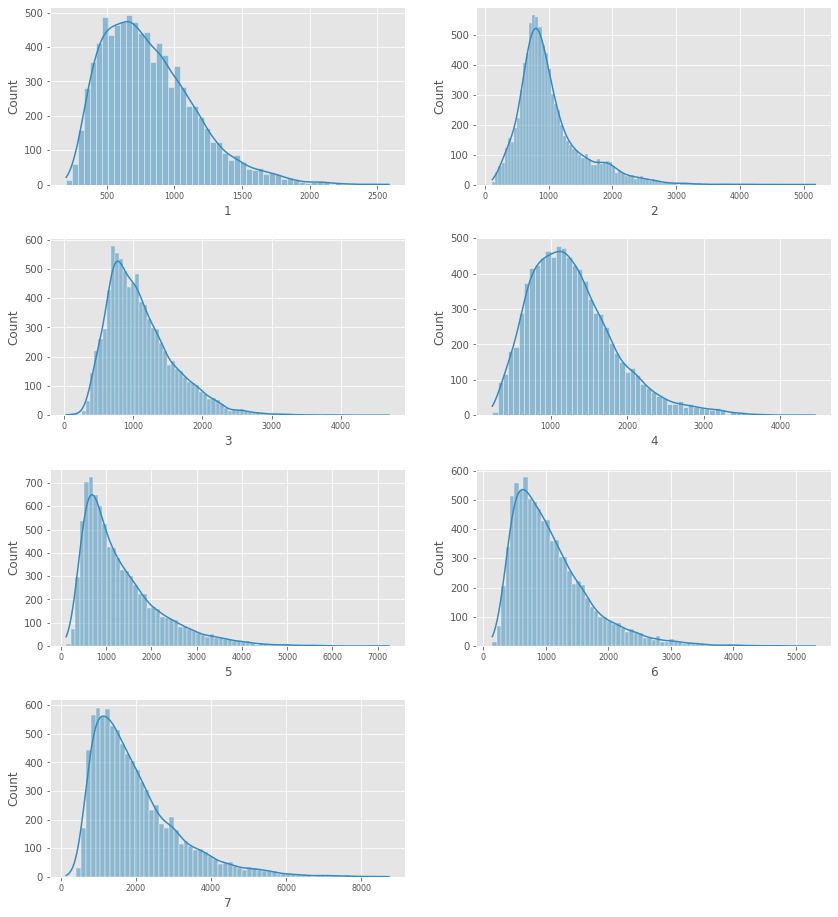

In [12]:
## Histograms: Plotting feature distributions

# Features to plot
columns = data_cluster.columns

# Creating subplot axes
fig, axes = plt.subplots(4, 2, figsize=(14,16), sharey=False)
axes[3,1].set_axis_off()

# Iterating through axes and columns
for col, ax in zip(columns, axes.flatten()):
    sns.histplot(x=col, kde=True, data=data_cluster, ax=ax)
    ax.tick_params(axis='x', labelsize=8)
    ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
    plt.subplots_adjust(hspace=0.3);

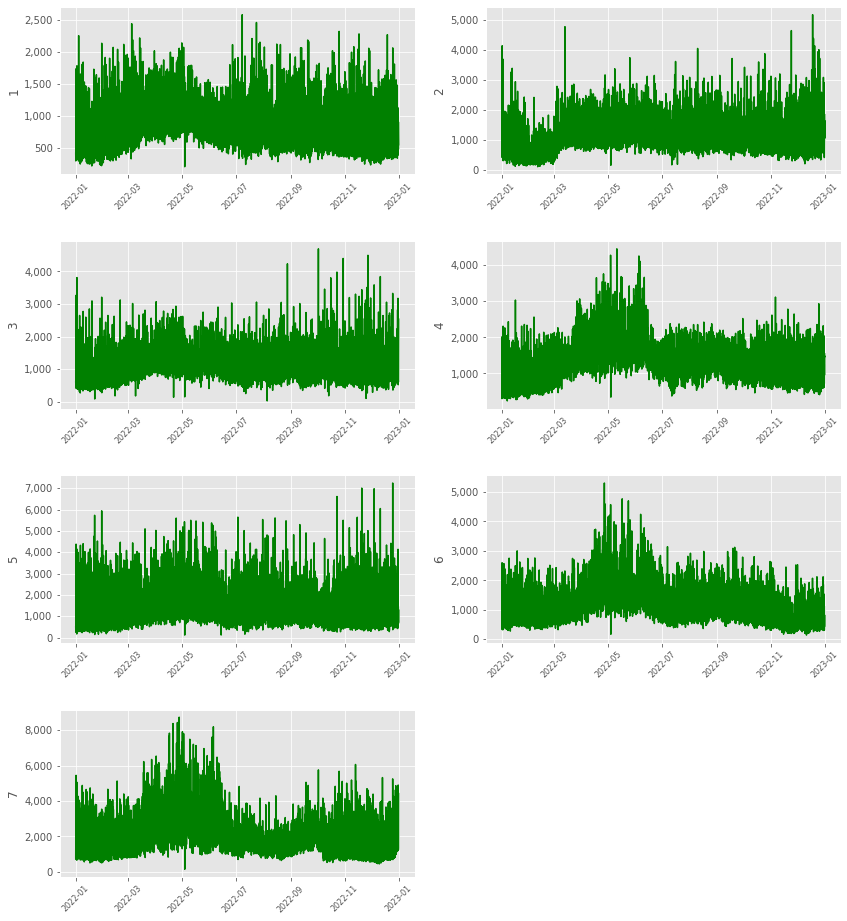

In [13]:
## Plotting features over time

# Features to plot
columns = data_cluster.columns

# Creating subplot axes
fig, axes = plt.subplots(4, 2, figsize=(14,16), sharey=False)
axes[3,1].set_axis_off()

# Iterating through axes and columns
for col, ax in zip(columns, axes.flatten()):
    sns.lineplot(data=data_cluster, x=data_cluster.index, y=col, ax=ax, color='green')
    ax.tick_params(axis='x', labelrotation=45, labelsize=8)
    ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
    plt.subplots_adjust(hspace=0.4);

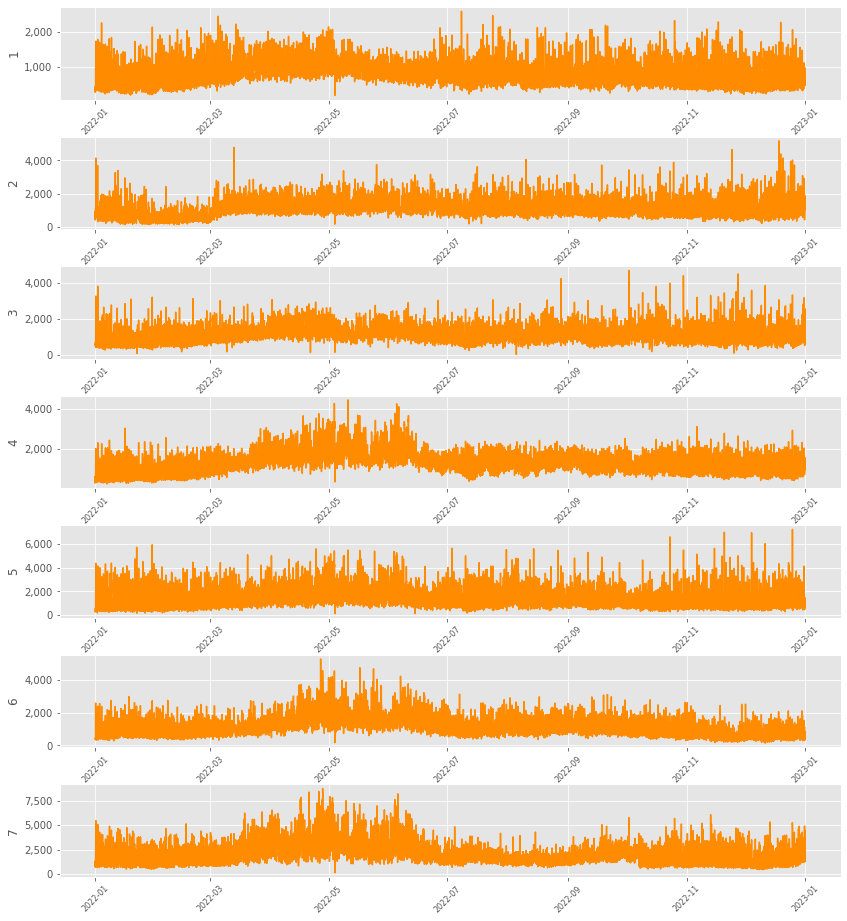

In [14]:
## Plotting features over time (with a different aspect ratio)

# Features to plot
columns = data_cluster.columns

# Creating subplot axes
fig, axes = plt.subplots(7, 1, figsize=(14,16), sharey=False)

# Iterating through axes and columns
for col, ax in zip(columns, axes.flatten()):
    sns.lineplot(data=data_cluster, x=data_cluster.index, y=col, ax=ax, color='darkorange')
    ax.tick_params(axis='x', labelrotation=45, labelsize=8)
    ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
    plt.subplots_adjust(hspace=0.4);

In [15]:
for i in range(1,len(data_cluster.columns)+1):
    print(f'\033[1m Cluster {i} \033[0m')
    results = adfuller(data_cluster.iloc[i]) #results object is a tuple

    # Print Dicky-Fuller test results
    print(f'Dicky-Fuller test results:{results}\n') #0th element: test statistic, 1st element: pval

    # Print test statistic
    print(f'test statistic:{results[0]}\n')

    # Print p-value
    print(f'p-value:{np.round(results[1], 3)}\n')

    # Print critical values
    print(f'critical values:{results[4]}\n') 

    # Significance statement
    alpha = 0.05

    if results[1] < alpha:
        print(f'\033[1mp-value < {alpha}: We reject the null hypothesis\nConclusion: Time series is stationary\033[0m')
    else:
        print(f'\033[1mp-value > {alpha}: We accept the null hypothesis\nConclusion: Time series is not stationary due to trend\033[0m')

 Cluster 1 
Dicky-Fuller test results:(-2.1340189752820224, 0.23105718323109153, 0, 6, {'1%': -5.354256481481482, '5%': -3.6462381481481483, '10%': -2.901197777777778}, 76.26452040451024)

test statistic:-2.1340189752820224

p-value:0.231

critical values:{'1%': -5.354256481481482, '5%': -3.6462381481481483, '10%': -2.901197777777778}

p-value > 0.05: We accept the null hypothesis
Conclusion: Time series is not stationary due to trend
 Cluster 2 
Dicky-Fuller test results:(-1.5351639184397379, 0.5160501268845021, 1, 5, {'1%': -6.045114, '5%': -3.9292800000000003, '10%': -2.98681}, 74.36676748055848)

test statistic:-1.5351639184397379

p-value:0.516

critical values:{'1%': -6.045114, '5%': -3.9292800000000003, '10%': -2.98681}

p-value > 0.05: We accept the null hypothesis
Conclusion: Time series is not stationary due to trend
 Cluster 3 
Dicky-Fuller test results:(-2.2125621431892246, 0.20171775687704846, 1, 5, {'1%': -6.045114, '5%': -3.9292800000000003, '10%': -2.98681}, 65.94432659

In [16]:
def split_data(data, test_size=0.2, analysis='univariate'):
    """
    Function to split time series data into train and test set
    Parameters:
        test_size: float, default=0.2
        analysis: {'univariate', 'univariate'}, default='univariate'
    """
    if analysis == 'univariate':
        position = int(round(len(data) * (1-test_size)))
        train = np.array(data[:position]).reshape(-1,1)
        test = np.array(data[position:]).reshape(-1,1)
    
    elif analysis == 'multivariate':
        position = int(round(len(data) * (1-test_size)))
        train = data[:position]
        test = data[position:]
        
    else:
        print("Please specify if analysis is univariate or multivariate")
        
    return train, test

In [17]:
def scale(data, train_split):
    """
    Function to scale the entire dataset using the mean and standard deviation of the training data only
    """
    data_mean = data[:train_split].mean(axis=0)
    data_std = data[:train_split].std(axis=0)
    
    return (data - data_mean) / data_std

In [18]:
def inv_scale(data, scaled_data, train_split):
    """
    Function to inverse scaling of data by using the mean and standard deviation of the training data only
    """
    data_mean = data[:train_split].mean(axis=0)
    data_std = data[:train_split].std(axis=0)
       
    return scaled_data * data_std + data_mean

In [19]:
def create_samples_univar(data, n_input, n_output):
    """
    Function to convert time series observations
    into input X and output y 
    """
    X, y = [], []
    
    for i in range(n_input, len(data)): #start, stop
        if i+n_output > len(data):
            break
        X.append(data[i-n_input : i])
        y.append(data[i : i+n_output]) 
        
    return np.array(X), np.array(y)

In [20]:
def create_samples_multivar(data, n_input, n_output, target_index=0):
    """
    Function to convert time series observations
    into input X and output y 
    """
    X, y = [], []
    
    # Move column defined by target_index to first position
    a=[]
    a = data[:, target_index].reshape(-1,1)
    b = np.delete(data, target_index, axis=1)
    data = np.concatenate((a, b), axis=1)
            
    for i in range(n_input, len(data)): #start, stop
        if i+n_output > len(data):
            break
        X.append(data[i-n_input : i, :])
        y.append(data[i : i+n_output, 0]) 
        
    return np.array(X), np.array(y)

In [21]:
def summarize_scores(name, score, scores):
    """
    Function to summarize scores
    """
    s_scores = ', '.join(['%.1f' % s for s in scores])
    print('%s: [%.3f] %s' % (name, score, s_scores))

In [22]:
def plot_model(history):
    """
    Function to plot training and validation loss
    """
    plt.figure(figsize=(10,5))
    plt.plot(history.history["loss"], color="r", label="Training Loss")
    plt.plot(history.history["val_loss"], color="b", label="Validation Loss")
    plt.legend(loc="upper right")
    plt.xlabel("Epoch", fontsize=16)
    plt.ylabel("Loss", fontsize=16)
    plt.ylim([0, max(plt.ylim())])
    plt.title("Training and Validation Loss", fontsize=16);

 Cluster 1 
2022-01-01 00:00:00    413.692308
2022-01-01 01:00:00    340.923077
2022-01-01 02:00:00    293.307692
2022-01-01 03:00:00    305.538462
2022-01-01 04:00:00    466.153846
Name: 1, dtype: float64
6570
[413.69230769 340.92307692 293.30769231 ... 620.15384615 690.23076923
 487.15384615]
(8760,) [-1.30046043 -1.51682097 -1.65839304 ... -0.6866003  -0.47824465
 -1.0820415 ]
Shape train: (6570, 1) 
Shape test: (2190, 1) 

[[-1.30046043]
 [-1.51682097]
 [-1.65839304]
 [-1.622028  ]
 [-1.14447958]]


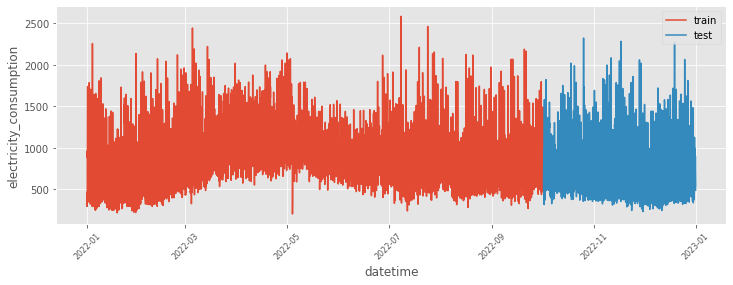

Shape X_train y_train: (6523, 24, 1) (6523, 24, 1) 
Shape X_test y_test: (2143, 24, 1) (2143, 24, 1) 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 24, 100)           40800     
                                                                 
 lstm_1 (LSTM)               (None, 50)                30200     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 24)                1224      
                                                                 
Total params: 72224 (282.12 KB)
Trainable params: 72224 (282.12 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Test loss: 0.5282
Test mae: 0.5465

Overal

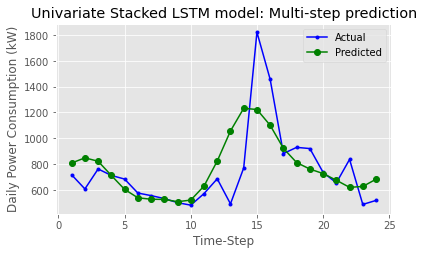

 Cluster 2 
2022-01-01 00:00:00    716.50
2022-01-01 01:00:00    925.75
2022-01-01 02:00:00    430.75
2022-01-01 03:00:00    558.50
2022-01-01 04:00:00    435.50
Name: 2, dtype: float64
6570
[ 716.5   925.75  430.75 ... 1332.25 1652.5  1076.5 ]
(8760,) [-0.63604821 -0.22492097 -1.19748003 ...  0.57375632  1.20297256
  0.07126747]
Shape train: (6570, 1) 
Shape test: (2190, 1) 

[[-0.63604821]
 [-0.22492097]
 [-1.19748003]
 [-0.94648121]
 [-1.1881474 ]]


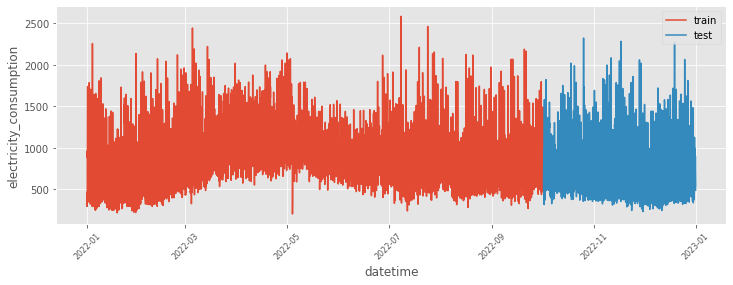

Shape X_train y_train: (6523, 24, 1) (6523, 24, 1) 
Shape X_test y_test: (2143, 24, 1) (2143, 24, 1) 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 24, 100)           40800     
                                                                 
 lstm_1 (LSTM)               (None, 50)                30200     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 24)                1224      
                                                                 
Total params: 72224 (282.12 KB)
Trainable params: 72224 (282.12 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Test loss: 0.8931
Test mae: 0.6331

Overal

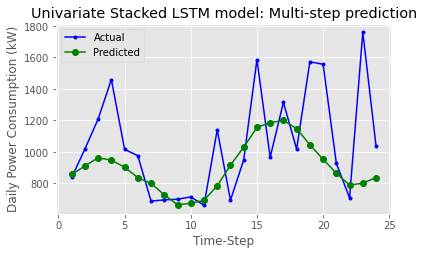

 Cluster 3 
2022-01-01 00:00:00    608.333333
2022-01-01 01:00:00    594.444444
2022-01-01 02:00:00    602.444444
2022-01-01 03:00:00    529.666667
2022-01-01 04:00:00    474.111111
Name: 3, dtype: float64
6570
[ 608.33333333  594.44444444  602.44444444 ... 2558.         1056.44444444
  629.11111111]
(8760,) [-1.08120759 -1.11059397 -1.09366742 ...  3.04393446 -0.13308553
 -1.03724557]
Shape train: (6570, 1) 
Shape test: (2190, 1) 

[[-1.08120759]
 [-1.11059397]
 [-1.09366742]
 [-1.24765203]
 [-1.36519754]]


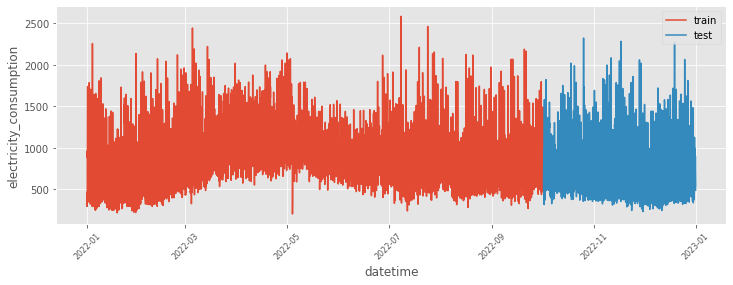

Shape X_train y_train: (6523, 24, 1) (6523, 24, 1) 
Shape X_test y_test: (2143, 24, 1) (2143, 24, 1) 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 24, 100)           40800     
                                                                 
 lstm_1 (LSTM)               (None, 50)                30200     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 24)                1224      
                                                                 
Total params: 72224 (282.12 KB)
Trainable params: 72224 (282.12 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Test loss: 0.8069
Test mae: 0.6278

Overal

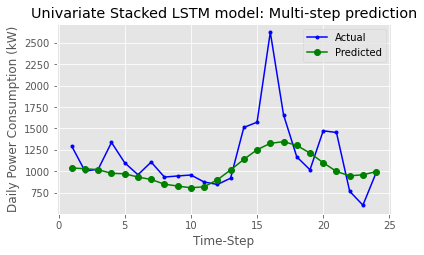

 Cluster 4 
2022-01-01 00:00:00    311.666667
2022-01-01 01:00:00    627.500000
2022-01-01 02:00:00    326.555556
2022-01-01 03:00:00    324.277778
2022-01-01 04:00:00    302.388889
Name: 4, dtype: float64
6570
[ 311.66666667  627.5         326.55555556 ... 1490.72222222 1357.33333333
  971.94444444]
(8760,) [-1.75592589 -1.22612296 -1.73095013 ...  0.22191187 -0.00184483
 -0.64832556]
Shape train: (6570, 1) 
Shape test: (2190, 1) 

[[-1.75592589]
 [-1.22612296]
 [-1.73095013]
 [-1.73477105]
 [-1.77148915]]


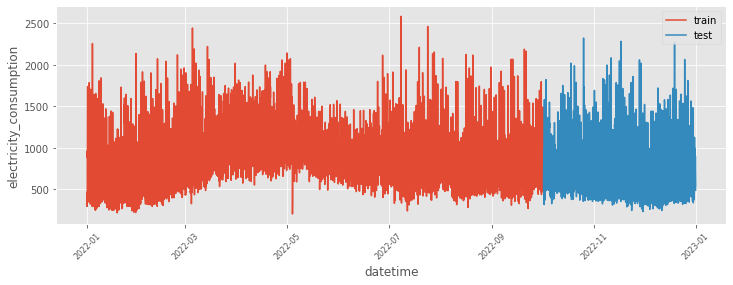

Shape X_train y_train: (6523, 24, 1) (6523, 24, 1) 
Shape X_test y_test: (2143, 24, 1) (2143, 24, 1) 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 24, 100)           40800     
                                                                 
 lstm_1 (LSTM)               (None, 50)                30200     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 24)                1224      
                                                                 
Total params: 72224 (282.12 KB)
Trainable params: 72224 (282.12 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Test loss: 0.1930
Test mae: 0.3360

Overal

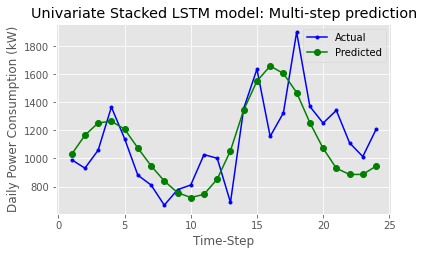

 Cluster 5 
2022-01-01 00:00:00    510.333333
2022-01-01 01:00:00    396.666667
2022-01-01 02:00:00    257.333333
2022-01-01 03:00:00    286.000000
2022-01-01 04:00:00    322.333333
Name: 5, dtype: float64
6570
[ 510.33333333  396.66666667  257.33333333 ... 1123.66666667 1318.
  738.        ]
(8760,) [-1.0271691  -1.15654395 -1.31513246 ... -0.32907611 -0.10788686
 -0.76804002]
Shape train: (6570, 1) 
Shape test: (2190, 1) 

[[-1.0271691 ]
 [-1.15654395]
 [-1.31513246]
 [-1.2825042 ]
 [-1.24114978]]


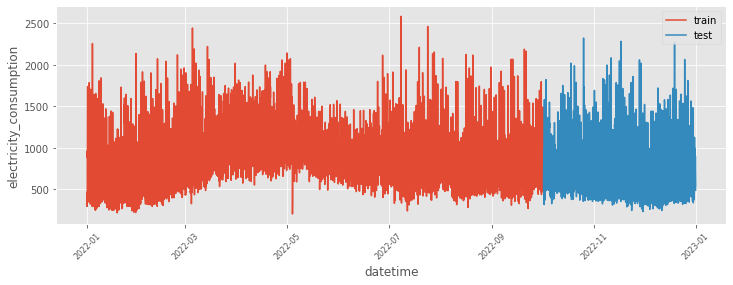

Shape X_train y_train: (6523, 24, 1) (6523, 24, 1) 
Shape X_test y_test: (2143, 24, 1) (2143, 24, 1) 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 24, 100)           40800     
                                                                 
 lstm_1 (LSTM)               (None, 50)                30200     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 24)                1224      
                                                                 
Total params: 72224 (282.12 KB)
Trainable params: 72224 (282.12 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Test loss: 0.5729
Test mae: 0.5234

Overal

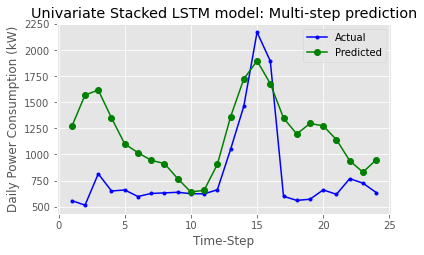

 Cluster 6 
2022-01-01 00:00:00    431.750
2022-01-01 01:00:00    426.625
2022-01-01 02:00:00    413.625
2022-01-01 03:00:00    432.750
2022-01-01 04:00:00    373.125
Name: 6, dtype: float64
6570
[431.75  426.625 413.625 ... 676.    543.5   450.5  ]
(8760,) [-1.2383585  -1.24649784 -1.26714395 ... -0.85044976 -1.06088132
 -1.20858045]
Shape train: (6570, 1) 
Shape test: (2190, 1) 

[[-1.2383585 ]
 [-1.24649784]
 [-1.26714395]
 [-1.23677034]
 [-1.33146454]]


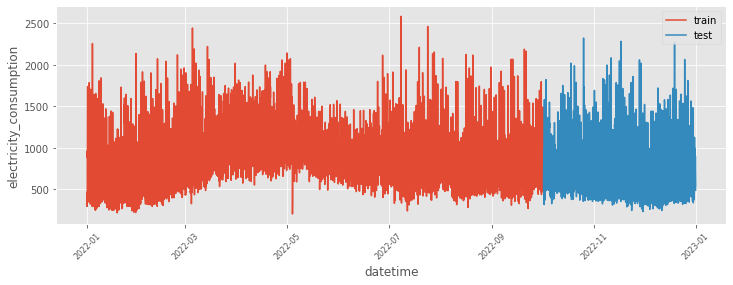

Shape X_train y_train: (6523, 24, 1) (6523, 24, 1) 
Shape X_test y_test: (2143, 24, 1) (2143, 24, 1) 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 24, 100)           40800     
                                                                 
 lstm_1 (LSTM)               (None, 50)                30200     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 24)                1224      
                                                                 
Total params: 72224 (282.12 KB)
Trainable params: 72224 (282.12 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Test loss: 0.3246
Test mae: 0.4626

Overal

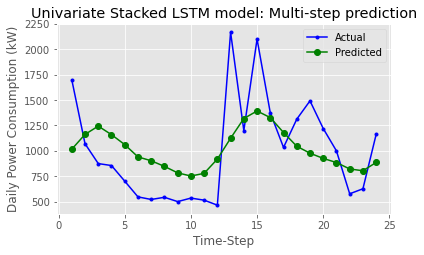

 Cluster 7 
2022-01-01 00:00:00     787.8
2022-01-01 01:00:00    1355.6
2022-01-01 02:00:00    1173.2
2022-01-01 03:00:00     784.8
2022-01-01 04:00:00     712.0
Name: 7, dtype: float64
6570
[ 787.8 1355.6 1173.2 ... 2550.2 3571.8 1287.6]
(8760,) [-1.12363782 -0.64867792 -0.80125398 ...  0.35059486  1.20515462
 -0.70555935]
Shape train: (6570, 1) 
Shape test: (2190, 1) 

[[-1.12363782]
 [-0.64867792]
 [-0.80125398]
 [-1.12614729]
 [-1.18704387]]


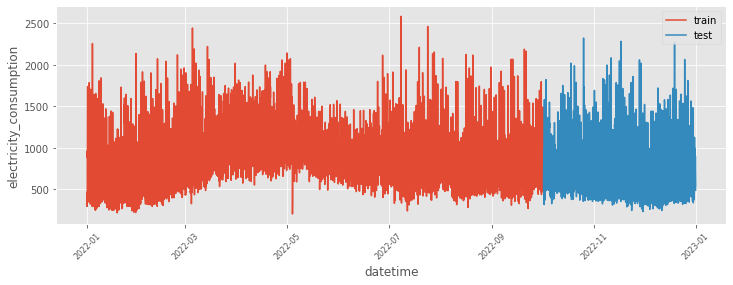

Shape X_train y_train: (6523, 24, 1) (6523, 24, 1) 
Shape X_test y_test: (2143, 24, 1) (2143, 24, 1) 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 24, 100)           40800     
                                                                 
 lstm_1 (LSTM)               (None, 50)                30200     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 24)                1224      
                                                                 
Total params: 72224 (282.12 KB)
Trainable params: 72224 (282.12 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Test loss: 0.3079
Test mae: 0.4107

Overal

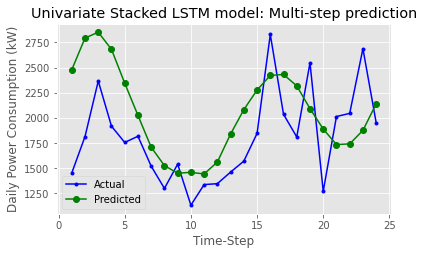

In [27]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Assuming necessary functions like scale(), split_data(), create_samples_univar(), and inv_scale() are already defined.

# Input data: clusters (total daily consumption)
for i in range(1, len(data_cluster.columns) + 1):
    print(f'\033[1m Cluster {i} \033[0m')
    feature = data_cluster.T.iloc[i-1]
    print(feature.head())
    
    # Define train/test split
    test_size = 0.25
    TRAIN_SPLIT = int(round(len(data_cluster) * (1 - test_size)))
    print(TRAIN_SPLIT)
    
    # Get data values
    univar_data = feature.values
    print(univar_data)
    
    # Scale data (using training data)
    univar_data_scaled = scale(univar_data, TRAIN_SPLIT)
    print(univar_data_scaled.shape, univar_data_scaled)
    
    # Split data into train and test
    train, test = split_data(data=univar_data_scaled, test_size=test_size, analysis='univariate')
    
    # Print shape and first 5 values for train set
    print("Shape train:", train.shape, "\nShape test:", test.shape, '\n')
    print(train[:5])
    
    # Visualize train/test split
    plt.figure(figsize=(12, 4))
    plt.plot(data_cluster.iloc[:len(train), 0])
    plt.plot(data_cluster.iloc[len(train):, 0])
    plt.xlabel('datetime')
    plt.ylabel("electricity_consumption")
    plt.tick_params(axis='x', labelrotation=45, labelsize=8)
    plt.legend(['train', 'test'])
    plt.show()
    
    # Create samples for train and test set
    n_input = 24
    n_output = 24

    X_train, y_train = create_samples_univar(train, n_input=n_input, n_output=n_output)
    X_test, y_test = create_samples_univar(test, n_input=n_input, n_output=n_output)

    # Print shape and first 3 values for train set
    print("Shape X_train y_train:", X_train.shape, y_train.shape,
          "\nShape X_test y_test:", X_test.shape, y_test.shape, '\n')

    # Create model
    clear_session()

    n_features = X_train.shape[2]
    n_input = X_train.shape[1]
    n_output = y_train.shape[1]

    model = Sequential()
    model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(n_input, n_features)))
    model.add(LSTM(50, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(n_output))
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])

    print(model.summary())

    # Fit model
    epochs = 10
    verbose = 0
    batch_size = 16  # Default 32

    history = model.fit(X_train, y_train, epochs=epochs, verbose=verbose, batch_size=batch_size, validation_data=(X_test, y_test))

    # Evaluate model
    score = model.evaluate(X_test, y_test, verbose=0)
    print(f'Test loss: {score[0]:.4f}') 
    print(f'Test mae: {score[1]:.4f}')

    # Make predictions
    yhat = model.predict(X_test, verbose=0)
    yhat_inv = inv_scale(univar_data, yhat, TRAIN_SPLIT)
    y_test_inv = inv_scale(univar_data, y_test, TRAIN_SPLIT)

    # Calculate metrics
    actual = y_test_inv
    predicted = yhat_inv

        # Flatten the arrays to 1D for metric calculations
    actual_flat = actual.flatten()
    predicted_flat = predicted.flatten()

    # Calculate metrics
    rmse_total = mean_squared_error(actual_flat, predicted_flat, squared=False)
    mae_total = mean_absolute_error(actual_flat, predicted_flat)
    mape_total = np.mean(np.abs((actual_flat - predicted_flat) / actual_flat)) * 100
    smape_total = 100 * np.mean(2 * np.abs(actual_flat - predicted_flat) / (np.abs(actual_flat) + np.abs(predicted_flat)))
    r_squared_total = r2_score(actual_flat, predicted_flat)

    # Print overall metrics
    print("\nOverall Metrics:")
    print(f"RMSE: {rmse_total:.3f}")
    print(f"MAE: {mae_total:.3f}")
    print(f"MAPE: {mape_total:.2f}%")
    print(f"sMAPE: {smape_total:.2f}%")
    print(f"R-squared: {r_squared_total:.3f}")

    # Plot predictions
    plt.figure(figsize=(6, 3.5))
    future_seq = np.arange(1, len(y_test_inv[0]) + 1)
    plt.plot(future_seq, actual[0], label='Actual', color='blue', marker='.')
    plt.plot(future_seq, predicted[0], label='Predicted', color='green', marker='o')
    plt.xlabel('Time-Step')
    plt.ylabel('Daily Power Consumption (kW)')
    plt.title('Univariate Stacked LSTM model: Multi-step prediction')
    plt.legend()
    plt.show()


 Cluster 1 
2022-01-01 00:00:00    413.692308
2022-01-01 01:00:00    340.923077
2022-01-01 02:00:00    293.307692
2022-01-01 03:00:00    305.538462
2022-01-01 04:00:00    466.153846
Name: 1, dtype: float64
6570
[413.69230769 340.92307692 293.30769231 ... 620.15384615 690.23076923
 487.15384615]
(8760,) [-1.30046043 -1.51682097 -1.65839304 ... -0.6866003  -0.47824465
 -1.0820415 ]
Shape train: (6570, 1) 
Shape test: (2190, 1) 

[[-1.30046043]
 [-1.51682097]
 [-1.65839304]
 [-1.622028  ]
 [-1.14447958]]
Shape X_train y_train: (6523, 24, 1) (6523, 24, 1) 
Shape X_test y_test: (2143, 24, 1) (2143, 24, 1) 

[[-1.30046043]
 [-1.51682097]
 [-1.65839304]
 [-1.622028  ]
 [-1.14447958]
 [-1.60601823]
 [-0.22025872]
 [ 0.33299302]
 [ 0.07752291]
 [ 1.38437715]
 [ 2.18212087]
 [ 2.64068628]
 [-0.48190402]
 [ 0.45238012]
 [-0.43890637]
 [-1.45529773]
 [-1.49051922]
 [-1.33225125]
 [-0.4919673 ]
 [ 1.15315041]
 [-0.67973897]
 [-0.70512589]
 [-0.90936475]
 [-1.06054267]] [[-1.22247001]
 [-1.39446063]

 dense (Dense)               (None, 24)                1224      
                                                                 
Total params: 72224 (282.12 KB)
Trainable params: 72224 (282.12 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Test loss: 0.5257
Test mae: 0.5327
dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])
loss= [0.7642518281936646, 0.6090233325958252, 0.5550053119659424, 0.5396143794059753, 0.5257790088653564]
mae [0.6678329706192017, 0.587400496006012, 0.5591444373130798, 0.5508024096488953, 0.5431391596794128]
(1, 24, 1)
(1, 24)
[[-0.2928799  -0.19093618 -0.33558273 -0.59854263 -0.83891076 -1.0013053
  -1.1070169  -1.1183765  -1.2306803  -1.1684495  -0.7248386   0.09934835
   0.9161257   1.4475952   1.4099816   0.8759671   0.20273137 -0.20996386
  -0.44126892 -0.5627431  -0.71977794 -0.8081215  -0.7854458  -0.61470187]]
(1, 24)
[[ 752.5751   786.8621   738.2127   649.77057  568.92676  514.3081
   478

 [-1.22247001]] [[-1.39446063]
 [-1.37181824]
 [-1.46673328]
 [-0.87643037]
 [-0.81170518]
 [-1.49326375]
 [-0.63536905]
 [-0.24107141]
 [ 2.77654058]
 [ 1.46945762]
 [ 0.06814576]
 [-1.12298075]
 [-0.82336944]
 [ 0.56376234]
 [-0.82085362]
 [-1.34940457]
 [-0.736688  ]
 [ 0.25774712]
 [-0.33735871]
 [-1.01617275]
 [-0.6468046 ]
 [-0.12580111]
 [-0.98483935]
 [-1.26935575]]
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 24, 100)           40800     
                                                                 
 lstm_1 (LSTM)               (None, 50)                30200     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 24)                1224      
         

Shape X_train y_train: (6523, 24, 1) (6523, 24, 1) 
Shape X_test y_test: (2143, 24, 1) (2143, 24, 1) 

[[-1.30046043]
 [-1.51682097]
 [-1.65839304]
 [-1.622028  ]
 [-1.14447958]
 [-1.60601823]
 [-0.22025872]
 [ 0.33299302]
 [ 0.07752291]
 [ 1.38437715]
 [ 2.18212087]
 [ 2.64068628]
 [-0.48190402]
 [ 0.45238012]
 [-0.43890637]
 [-1.45529773]
 [-1.49051922]
 [-1.33225125]
 [-0.4919673 ]
 [ 1.15315041]
 [-0.67973897]
 [-0.70512589]
 [-0.90936475]
 [-1.06054267]] [[-1.22247001]
 [-1.39446063]
 [-1.37181824]
 [-1.46673328]
 [-0.87643037]
 [-0.81170518]
 [-1.49326375]
 [-0.63536905]
 [-0.24107141]
 [ 2.77654058]
 [ 1.46945762]
 [ 0.06814576]
 [-1.12298075]
 [-0.82336944]
 [ 0.56376234]
 [-0.82085362]
 [-1.34940457]
 [-0.736688  ]
 [ 0.25774712]
 [-0.33735871]
 [-1.01617275]
 [-0.6468046 ]
 [-0.12580111]
 [-0.98483935]]
[[-1.51682097]
 [-1.65839304]
 [-1.622028  ]
 [-1.14447958]
 [-1.60601823]
 [-0.22025872]
 [ 0.33299302]
 [ 0.07752291]
 [ 1.38437715]
 [ 2.18212087]
 [ 2.64068628]
 [-0.48190

(1, 24)
[[-0.2618094  -0.2546681  -0.45807642 -0.69714826 -0.89397    -1.0090935
  -1.0474292  -1.0498614  -1.0164642  -0.9311202  -0.54368407  0.03818648
   0.6432414   1.1309415   1.1379073   0.7491759   0.2647132  -0.05314015
  -0.17303112 -0.26459312 -0.4424675  -0.63688207 -0.61968464 -0.49734944]]
(1, 24)
[[ 763.02515  765.427    697.01404  616.6062   550.40857  511.6887
   498.7951   497.97708  509.20966  537.9137   668.2213   863.9237
  1067.4237  1231.4535  1233.7963  1103.053    940.1122   833.2075
   792.8842   762.08887  702.2638   636.87573  642.6598   683.8052 ]]
(2143, 24, 1) (2143, 24, 1)
Randomly selected sample: 1443
Randomly selected sample: 571
Randomly selected sample: 341
(24, 1) (24, 1)
actual= [[ 716.46153846]
 [ 607.07692308]
 [ 761.84615385]
 [ 711.69230769]
 [ 683.53846154]
 [ 575.46153846]
 [ 555.30769231]
 [ 532.53846154]
 [ 500.61538462]
 [ 481.30769231]
 [ 570.84615385]
 [ 685.61538462]
 [ 491.30769231]
 [ 769.84615385]
 [1822.53846154]
 [1456.76923077]
 

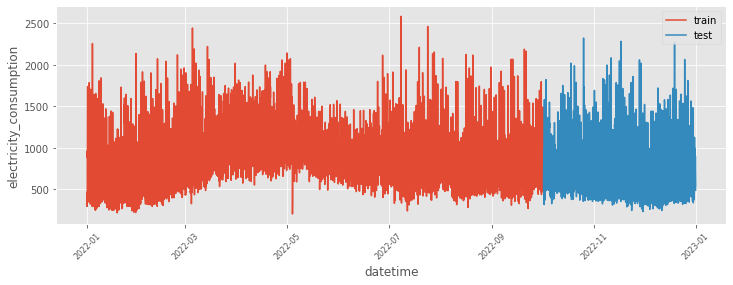

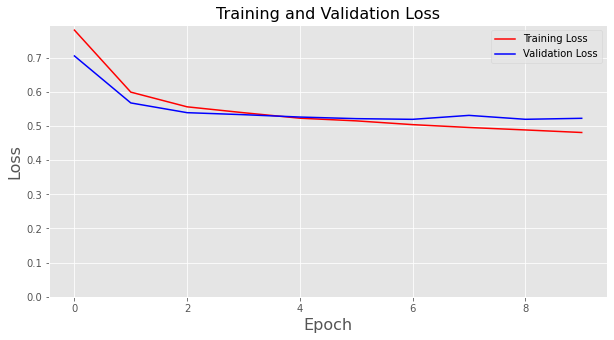

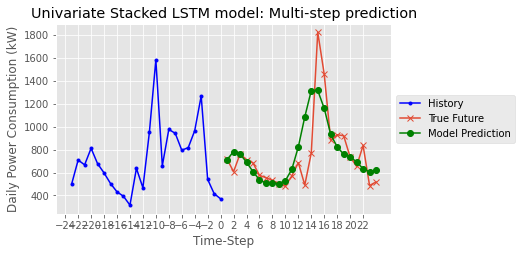

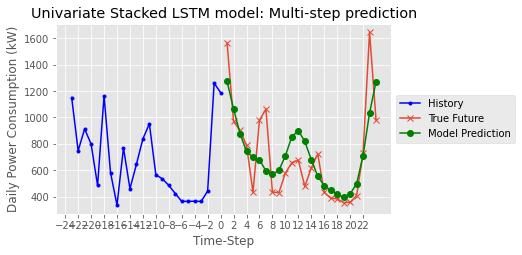

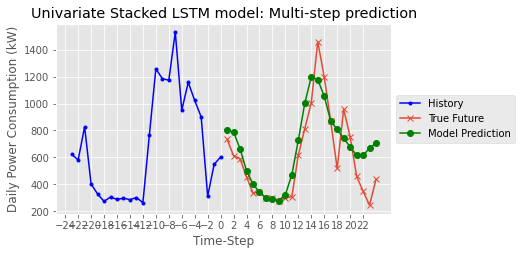

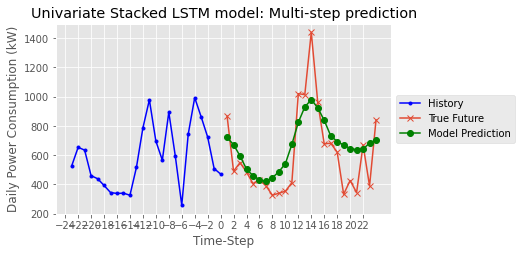

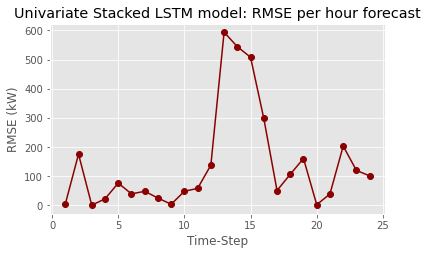

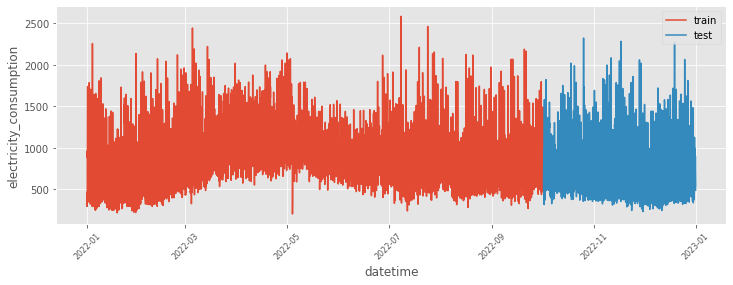

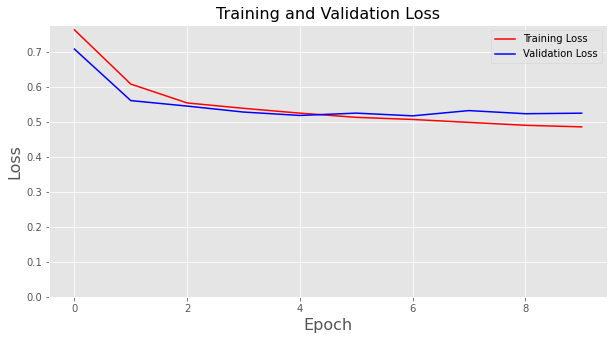

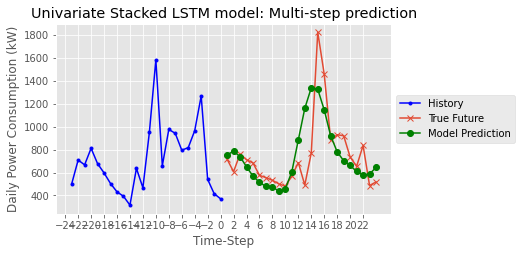

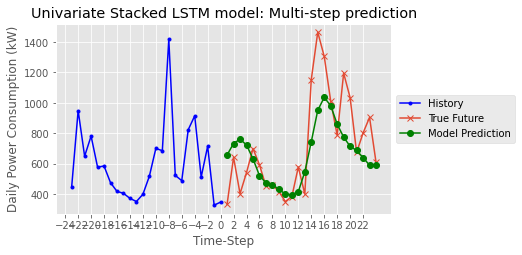

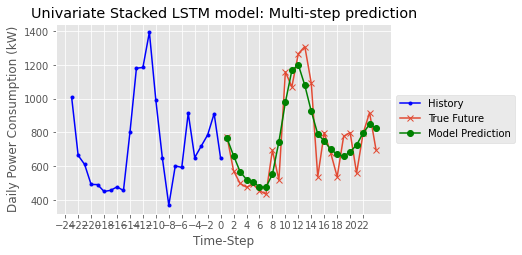

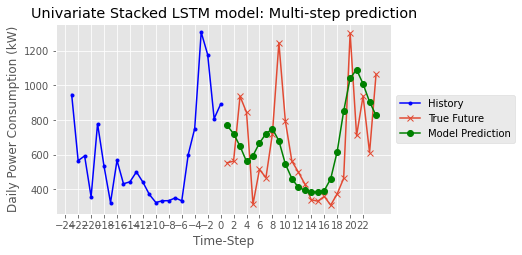

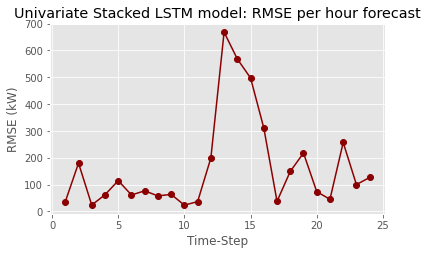

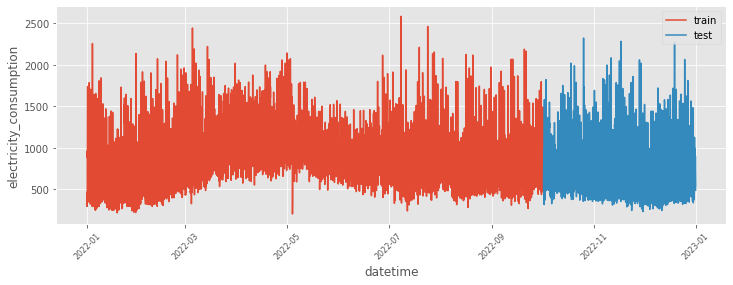

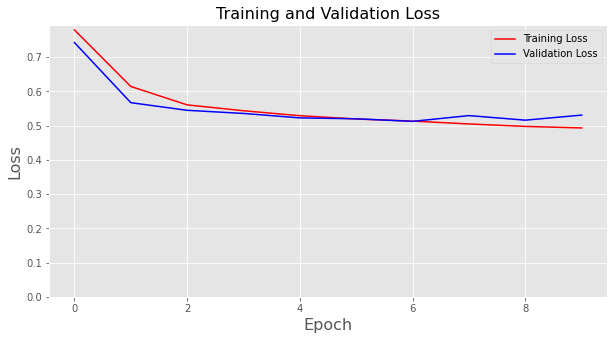

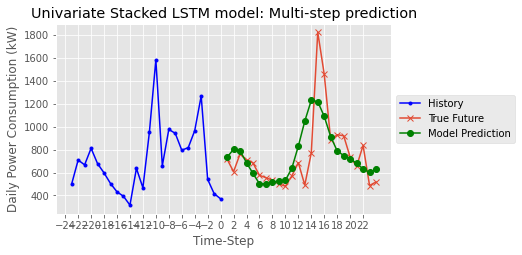

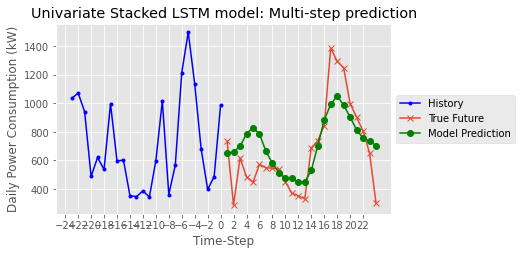

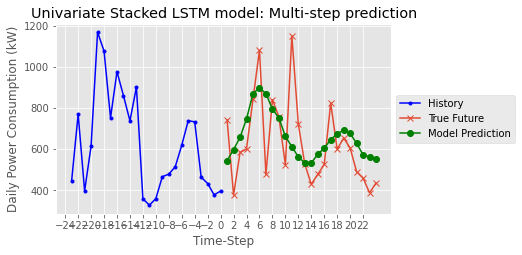

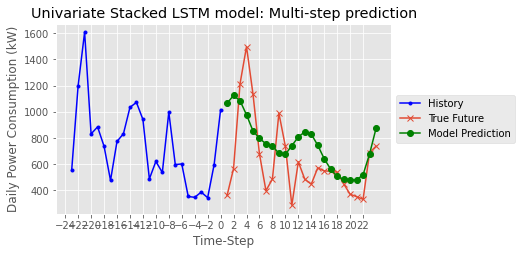

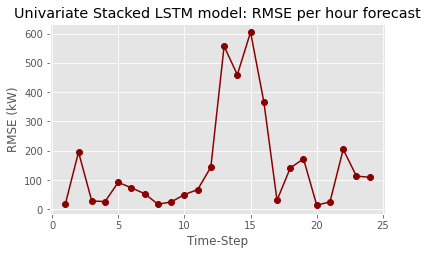

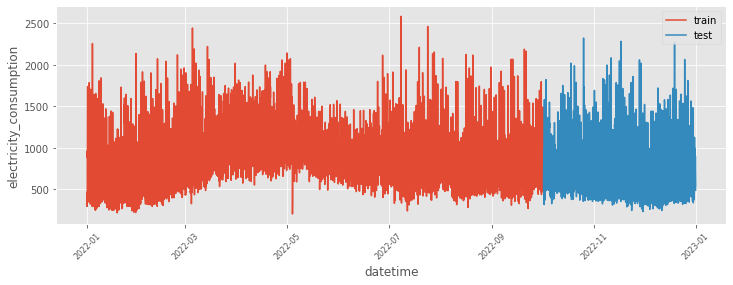

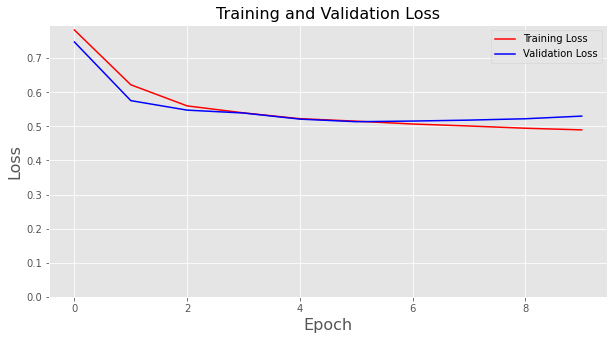

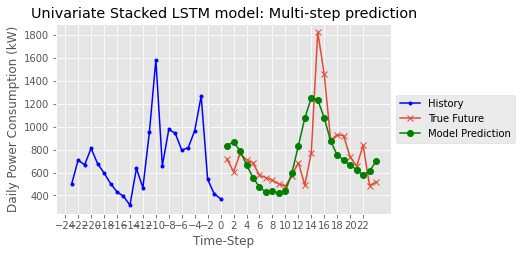

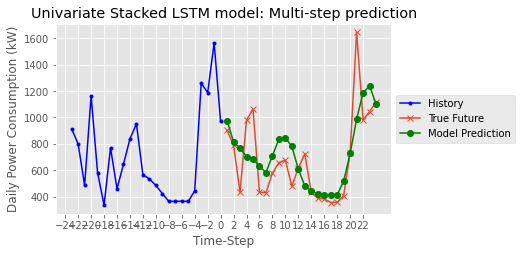

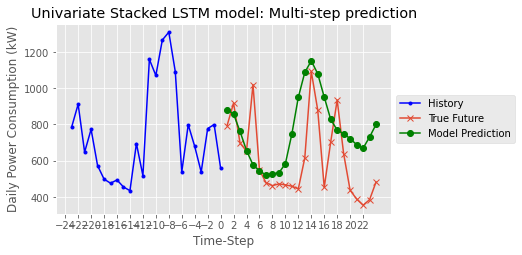

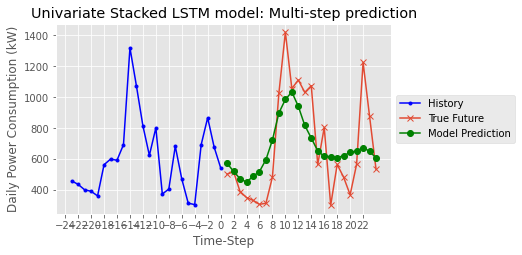

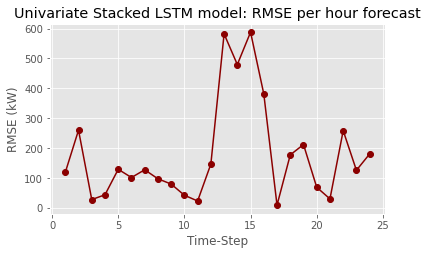

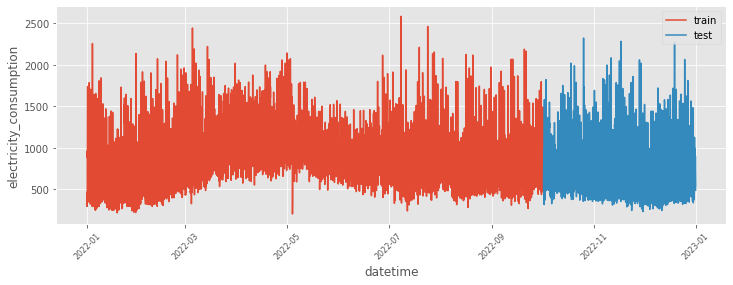

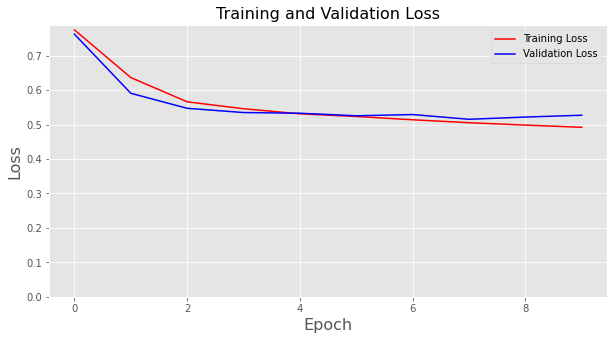

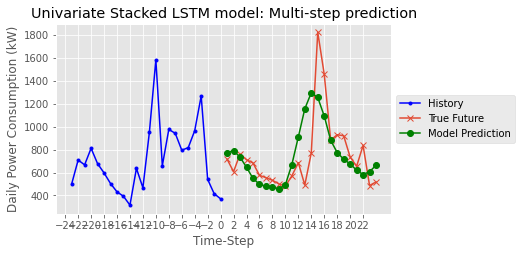

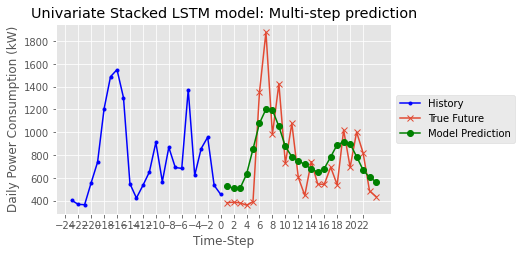

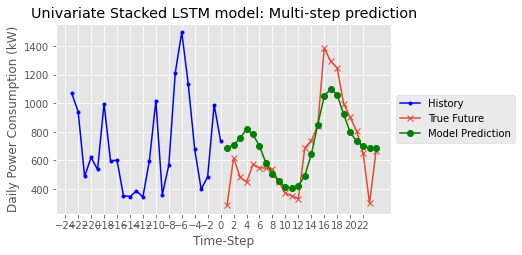

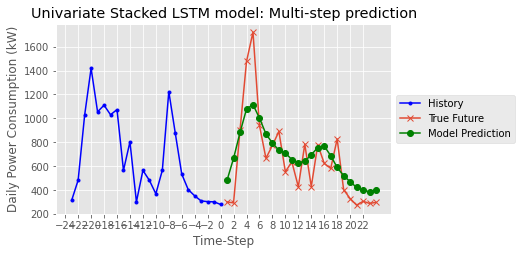

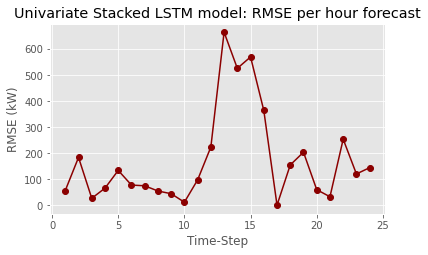

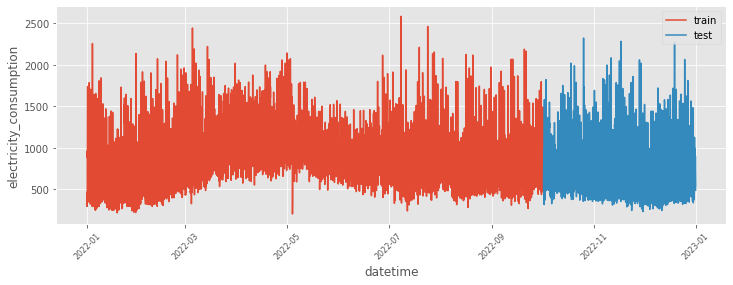

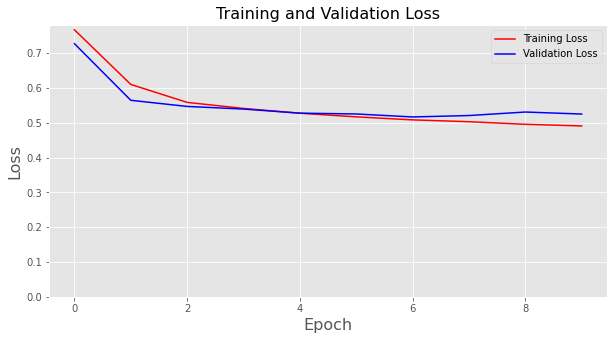

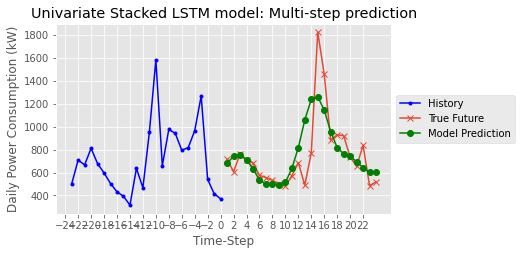

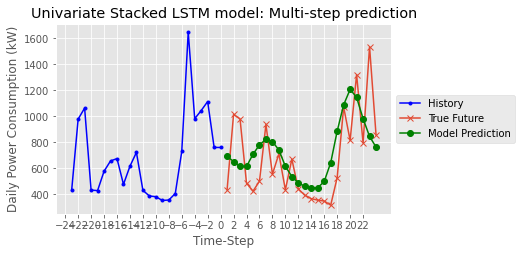

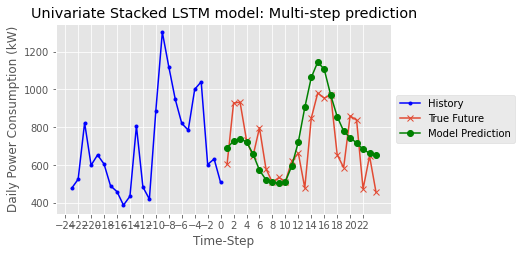

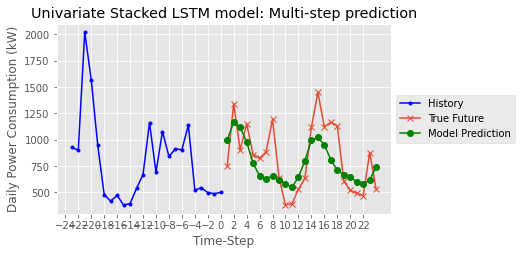

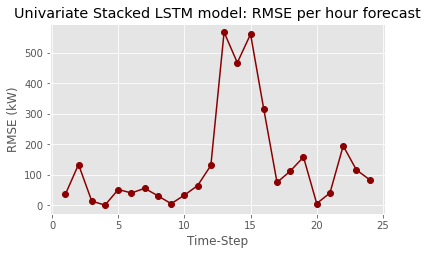

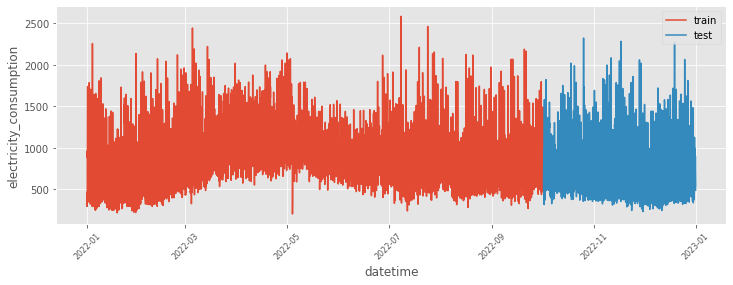

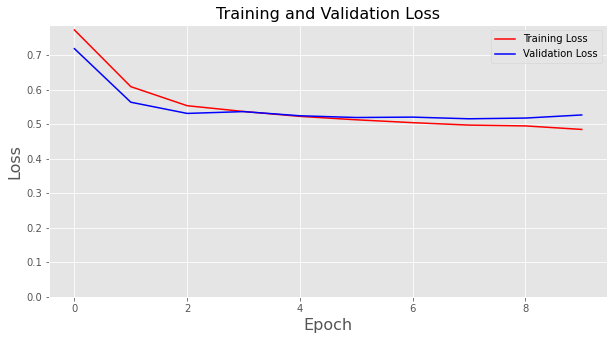

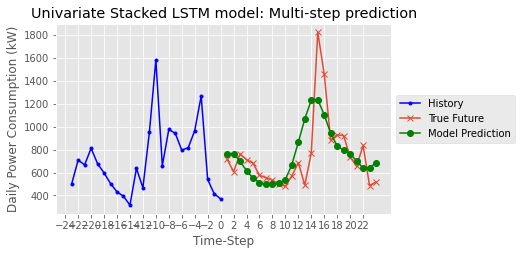

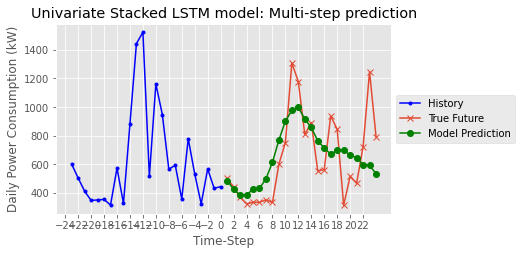

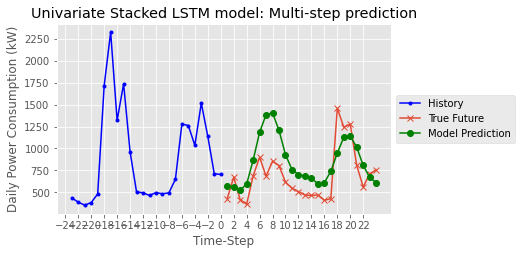

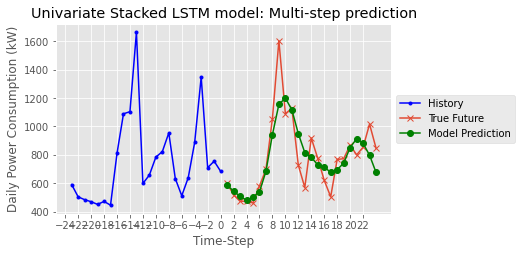

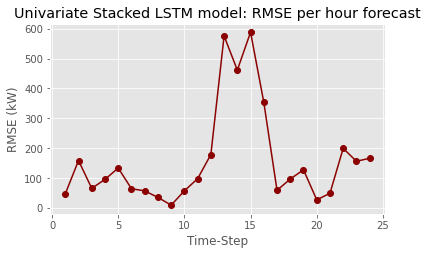

In [29]:
# Input data: clusters (total daily consumption)
for i in range(1,len(data_cluster.columns)+1):
    print(f'\033[1m Cluster {i} \033[0m')
    feature = data_cluster.T.iloc[0]
    print(feature.head())
    # Define train/test split
    test_size = 0.25
    TRAIN_SPLIT = int(round(len(data_cluster) * (1-test_size)))
    print(TRAIN_SPLIT)
    # Get data values
    univar_data = feature.values
    print(univar_data)
    # Scale data (using training data)
    univar_data_scaled = scale(univar_data, TRAIN_SPLIT)
    print(univar_data_scaled.shape, univar_data_scaled)
    # Split data into train and test
    train, test = split_data(data=univar_data_scaled, test_size=test_size, analysis='univariate')

    # Print shape and first 5 values for train set
    print("Shape train:", train.shape, "\nShape test:", test.shape, '\n')
    print(train[:5])
    # Visualize train/test split
    plt.figure(figsize=(12,4))
    plt.plot(data_cluster.iloc[:len(train), 0])
    plt.plot(data_cluster.iloc[len(train):, 0])
    plt.xlabel('datetime')
    plt.ylabel("electricity_consumption")
    plt.tick_params(axis='x', labelrotation=45, labelsize=8)
    plt.legend(['train','test']);
    
    # Create samples for train and test set
    n_input = 24    
    n_output = 24

    X_train, y_train = create_samples_univar(train, n_input=n_input, n_output=n_output)
    X_test, y_test = create_samples_univar(test, n_input=n_input, n_output=n_output)

    # Print shape and first 3 values for train set
    print("Shape X_train y_train:", X_train.shape, y_train.shape,
          "\nShape X_test y_test:", X_test.shape, y_test.shape, '\n')
    for i in range(2):
        print(X_train[i], y_train[i])
    #print(train[-5:], test[-5:])
    #print(X_train[-1], y_train[-1])
    #print(X_test[-1], y_test[-1])
    #print(X_train[0], y_train[0])
    #print(X_test[0], y_test[0])
    # Create model
    clear_session()

    n_features = X_train.shape[2]
    n_input = X_train.shape[1]
    n_output = y_train.shape[1]

    model = Sequential()
    model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(n_input, n_features)))
    model.add(LSTM(50, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(n_output))
    model.compile(optimizer='adam', loss='mse', metrics='mae') # mae: mean absolute error

    print(model.summary())
    #print(%%time)

    # Fit model
    epochs = 10
    verbose = 0
    batch_size = 16 #default 32

    history = model.fit(X_train, y_train, epochs=epochs, verbose=verbose, batch_size=batch_size, validation_data=(X_test, y_test))
    plot_model(history)
    
    # Loss and mae value for the model in test mode
    score = model.evaluate(X_test, y_test, verbose = 0)
    print(f'Test loss: {score[0]:.4f}') 
    print(f'Test mae: {score[1]:.4f}')
    
    # List all data in history
    print(history.history.keys())
    print("loss=",history.history["loss"][:5])
    print("mae",history.history["mae"][:5])
    
    # Reshape data for prediction into [1, n_input, 1]
    x_input = X_test[0].reshape((1, len(X_test[0]), 1))
    print(x_input.shape)
    
        # Make prediction
    yhat = model.predict(x_input, verbose=0)

    print(yhat.shape)
    print(yhat)
    
    # Inverse scaling of prediction
    yhat_inv = inv_scale(univar_data, yhat, TRAIN_SPLIT)
    print(yhat_inv.shape)
    print(yhat_inv)
    
    # Inverse scaling of X_test, y_test
    X_test_inv = inv_scale(univar_data, X_test, TRAIN_SPLIT)
    y_test_inv = inv_scale(univar_data, y_test, TRAIN_SPLIT)

    print(X_test_inv.shape, y_test_inv.shape)
    
        # Plot prediction
    plt.figure(figsize=(6,3.5))

    past_seq = range(-len(X_test[0])+1, 1)
    future_seq = np.arange(1, len(y_test[0])+1)

    plt.plot(past_seq, X_test_inv[0], color='blue', marker='.', label='History')
    plt.plot(future_seq, y_test_inv[0], marker='x', label='True Future')
    plt.plot(future_seq, yhat_inv.reshape(-1,1), color='green', marker='o', label='Model Prediction')

    plt.xlabel('Time-Step')
    plt.ylabel('Daily Power Consumption (kW)')
    plt.xticks(range(-n_input,n_output,2))
    plt.title('Univariate Stacked LSTM model: Multi-step prediction')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=10);
       
    ## Now randomly select 3 more samples from the test set, perform model prediction and plot results 

    for i in random.sample(range(len(X_test)), 3):
        print(f"Randomly selected sample: {i}")

        # Reshape data for prediction into [1, n_input, 1]
        x_input = X_test[i].reshape((1, len(X_test[i]), 1))

        # Make prediction
        pred = model.predict(x_input, verbose=0)

        # Inverse scaling of prediction
        pred_inv = inv_scale(univar_data, pred, TRAIN_SPLIT)

        # Plot prediction
        plt.figure(figsize=(6,3.5))

        past_seq = range(-len(X_test[0])+1, 1)
        future_seq = np.arange(1, len(y_test[0])+1)

        plt.plot(past_seq, X_test_inv[i], color='blue', marker='.', label='History')
        plt.plot(future_seq, y_test_inv[i], marker='x', label='True Future')
        plt.plot(future_seq, pred_inv.reshape(-1,1), color='green', marker='o', label='Model Prediction')

        plt.xlabel('Time-Step')
        plt.ylabel('Daily Power Consumption (kW)')
        plt.xticks(range(-n_input,n_output,2))
        plt.title('Univariate Stacked LSTM model: Multi-step prediction')
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=10);
        
            # Actual values
    actual = y_test_inv[0]

    # Predicted values
    predicted = yhat_inv.reshape(-1,1)
    print(actual.shape, predicted.shape)
    print("actual=",actual)
    print("predicted=",predicted)
    
        # Calculate RMSE score for each day
    rmse_hour = []

    for i in range(actual.shape[0]):
        # calculate rmse
        rmse = mean_squared_error(actual[i], predicted[i], squared=False)
        rmse_hour.append(rmse)

    print(rmse_hour)
    
    # Store RMSE scores of each day in df
    df_rmse = pd.DataFrame(rmse_hour, columns=['Univariate Stacked LSTM'])

    # Plot RMSE score for each day
    future_seq = np.arange(1, len(y_test[0])+1)

    plt.figure(figsize=(6,3.5))
    plt.plot(future_seq, rmse_hour, marker='o', color='darkred')
    plt.xlabel('Time-Step')
    plt.ylabel('RMSE (kW)')
    plt.title('Univariate Stacked LSTM model: RMSE per hour forecast');

    # Calculate overall RMSE score (for the respective forecast period)
    rmse_total = mean_squared_error(actual, predicted, squared=False)
    rmse_total

    # Store overall RMSE score in dict
    performance_rmse = {}
    performance_rmse['Univariate Stacked LSTM'] = rmse_total

    # Summarize scores
    summarize_scores('RMSE scores for Univariate Stacked LSTM [total] per day', rmse_total, rmse_hour)


 Part 2: Multivariate LSTM Models (multi-step prediction)

 LSTM Model With Multivariate Input and Vector Outpu

Stacked LSTM

. Encoder-Decoder Model

In [397]:
# Create model
clear_session()

n_features = X_train.shape[2]
n_input = X_train.shape[1]
n_output = y_train.shape[1]

model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(RepeatVector(n_output))
model.add(LSTM(100, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(50, activation='relu')))
model.add(TimeDistributed(Dense(1)))
model.compile(optimizer='adam', loss='mse', metrics='mae')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 repeat_vector (RepeatVecto  (None, 7, 100)            0         
 r)                                                              
                                                                 
 lstm_1 (LSTM)               (None, 7, 100)            80400     
                                                                 
 time_distributed (TimeDist  (None, 7, 50)             5050      
 ributed)                                                        
                                                                 
 time_distributed_1 (TimeDi  (None, 7, 1)              51        
 stributed)                                                      
                                                        

In [398]:
%%time

# Fit model
epochs = 50
verbose = 0
batch_size = 16 #default 32

history = model.fit(X_train, y_train, epochs=epochs, verbose=verbose,
                    batch_size=batch_size, validation_data=(X_test, y_test))

Wall time: 4min


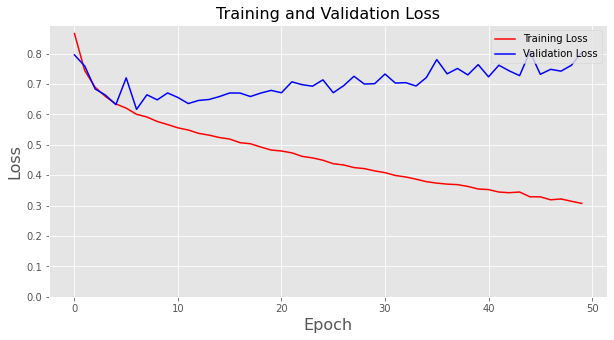

In [399]:
plot_model(history)

In [400]:
# Loss and mae value for the model in test mode
score = model.evaluate(X_test, y_test, verbose = 0)
print(f'Test loss: {score[0]:.4f}') 
print(f'Test mae: {score[1]:.4f}')

Test loss: 0.8042
Test mae: 0.6541


In [401]:
# List all data in history
print(history.history.keys())

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


In [402]:
history.history["loss"][:5]

[0.8658801913261414,
 0.7432999014854431,
 0.6890357136726379,
 0.6585932970046997,
 0.6342610120773315]

In [403]:
history.history["mae"][:5]

[0.7240991592407227,
 0.6621642708778381,
 0.6340150833129883,
 0.6186203956604004,
 0.6048982739448547]

In [404]:
# Reshape data for prediction into [1, n_input, n_features]
x_input = X_test[0].reshape((1, len(X_test[0]), n_features))
x_input.shape

(1, 14, 1)

In [405]:
# Make prediction
yhat = model.predict(x_input, verbose=0)

print(yhat.shape)
yhat

(1, 7, 1)


array([[[ 1.5292463 ],
        [ 0.8594192 ],
        [ 0.04219839],
        [-0.54312366],
        [-0.6604412 ],
        [-0.42399687],
        [-0.2827819 ]]], dtype=float32)

In [406]:
# Inverse scaling of prediction
yhat_inv = inv_scale(multivar_data[:,0], yhat, TRAIN_SPLIT) 
print(yhat_inv.shape)
yhat_inv

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [ ]:
# Convert (or resample) time series minutes data (here into total per day data)
ddf = data_cluster.resample('D').sum()

# Summarize resampled df
print(ddf.shape)
ddf.head(3)

In [ ]:
## Histograms: Plotting feature distributions

# Features to plot
columns = ddf.columns

# Creating subplot axes
fig, axes = plt.subplots(4, 2, figsize=(14,16), sharey=False)
axes[3,1].set_axis_off()

# Iterating through axes and columns
for col, ax in zip(columns, axes.flatten()):
    sns.histplot(x=col, kde=True, data=ddf, ax=ax)
    ax.tick_params(axis='x', labelsize=8)
    ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
    plt.subplots_adjust(hspace=0.3);

In [ ]:
## Plotting features over time

# Features to plot
columns = ddf.columns

# Creating subplot axes
fig, axes = plt.subplots(4, 2, figsize=(14,16), sharey=False)
axes[3,1].set_axis_off()

# Iterating through axes and columns
for col, ax in zip(columns, axes.flatten()):
    sns.lineplot(data=ddf, x=ddf.index, y=col, ax=ax, color='green')
    ax.tick_params(axis='x', labelrotation=45, labelsize=8)
    ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
    plt.subplots_adjust(hspace=0.4);

In [ ]:
## Plotting features over time (with a different aspect ratio)

# Features to plot
columns = ddf.columns

# Creating subplot axes
fig, axes = plt.subplots(7, 1, figsize=(14,16), sharey=False)

# Iterating through axes and columns
for col, ax in zip(columns, axes.flatten()):
    sns.lineplot(data=ddf, x=ddf.index, y=col, ax=ax, color='darkorange')
    ax.tick_params(axis='x', labelrotation=45, labelsize=8)
    ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
    plt.subplots_adjust(hspace=0.4);

Stationarity: Augmented Dicky-Fuller test
    
A statistical test to identify whether a time series is non-stationary is the augmented Dicky-Fuller test.

Null hypothesis H0 : Time series is not stationary due to trend.

In [ ]:
for i in range(1,len(ddf.columns)+1):
    print(f'\033[1m Cluster {i} \033[0m')
    results = adfuller(ddf.iloc[i]) #results object is a tuple

    # Print Dicky-Fuller test results
    print(f'Dicky-Fuller test results:{results}\n') #0th element: test statistic, 1st element: pval

    # Print test statistic
    print(f'test statistic:{results[0]}\n')

    # Print p-value
    print(f'p-value:{np.round(results[1], 3)}\n')

    # Print critical values
    print(f'critical values:{results[4]}\n') 

    # Significance statement
    alpha = 0.05

    if results[1] < alpha:
        print(f'\033[1mp-value < {alpha}: We reject the null hypothesis\nConclusion: Time series is stationary\033[0m')
    else:
        print(f'\033[1mp-value > {alpha}: We accept the null hypothesis\nConclusion: Time series is not stationary due to trend\033[0m')